In [20]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [21]:
df_red=pd.read_csv('C:\\Users\\Admin\\winequality-red.csv',encoding='cp1251', sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df_red.shape

(1599, 12)

In [23]:
#чтобы узнать разброс значений
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [25]:
from collections import Counter
Counter(df_red['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [26]:
Quality = df_red['quality'].values
category = []
for num in Quality:
    if num<5:
        category.append('Bad')
    else:
        category.append('Good')

In [27]:
category = pd.DataFrame(data=category, columns=['category'])
data = pd.concat([df_red,category],axis=1)
data.drop(columns='quality',axis=1,inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Good


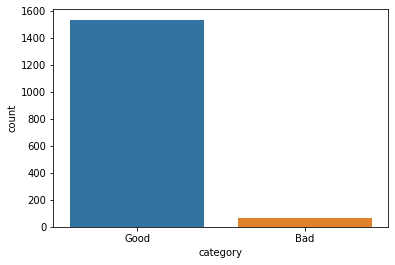

In [32]:
sns.countplot(data['category'])

In [35]:
x = data.iloc[:,:11]  # rest are features
y = data['category']  # set 'category' as target


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### SVM

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)              
svc_predict =svc.predict(x_test)   
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[  0  14]
 [  0 386]]
96.5


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', svc_predict[i])

Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good


#### Метод опорных векторов хорошо работает для решения задач бинарной классификации.

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(x_train, y_train)        
rf_predict=rf.predict(x_test)   
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  4  10]
 [  1 385]]
97.25


In [41]:
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', rf_predict[i])

Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good


#### Random Forest хорошо обрабатывает данные с большим числом признаков и классов. Алгоритм даёт довольно точные предсказания, поскольку он задействует два метода: бэггинг и ансамблирование.¶

### Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[  5   9]
 [ 10 376]]
95.25


In [43]:
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', nb_predict[i])

Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good


#### В данной задаче бинарной классификации Gaussian Naive Bayes показывет высокое качество классификации. 

### Gradient Boosting Classifier


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=150)
gb.fit(x_train, y_train)        
gb_predict=gb.predict(x_test) 
gb_conf_matrix = confusion_matrix(y_test, gb_predict)
gb_acc_score = accuracy_score(y_test, gb_predict)
print(gb_conf_matrix)
print(gb_acc_score*100)

[[  3  11]
 [  6 380]]
95.75


In [47]:
for i in range(0,5):
    print('Actual wine quality is ', y_test.iloc[i], ' and predicted is ', gb_predict[i])

Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Good
Actual wine quality is  Good  and predicted is  Bad


#### Gradient Boosting Classifier позволяет построить ансамбль моделей, итеративно уменьшая ошибку, и показывает хорошую классификацию.